# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

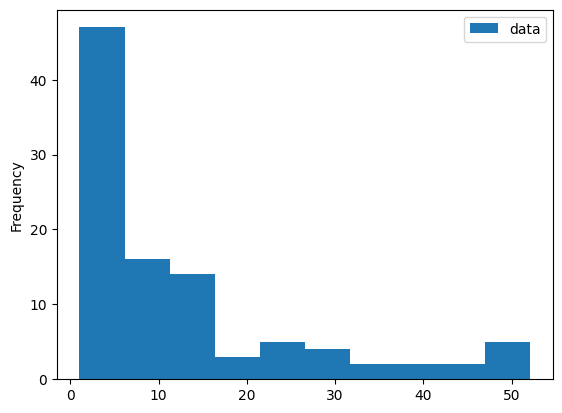

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

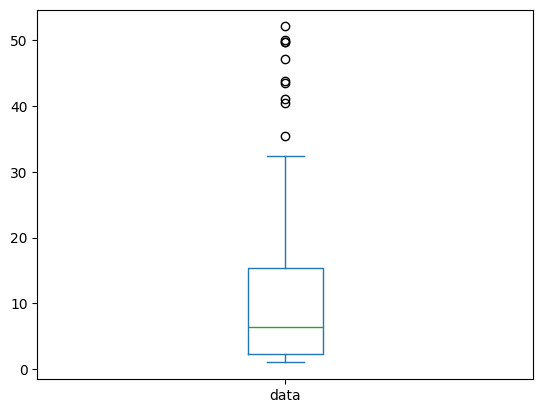

In [4]:
df.plot.box()

Overall both of the graphs are good for the problem at hand but can be improved by adding in better labeling for the data on both the X and Y axis as well as the title.  For this problem, I think the box and whisker plot serves a bit of a better purpose since it shows the percentiles of the data as well as any outliars that are a bit harder to read on the bar chart.  The bar chart does have some advantages over the box and whisker, as it may be easier to explain to a stakeholder who does not know what a box and whisker chart represents.  In addition, another advantge of the bar chart is the bins demonstrating multiple data points rather than individual points(for outliars) like the box and whisker has, overall, both charts need some improvemnt in terms of formatting(title, axis labels, and legend), but can both be good choices for different situations and stakeholders.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [14]:
car_claims_dataset = pd.read_csv("./carclaims.csv")
car_claims_dataset.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [50]:
car_claims_dataset.columns
# I will be plotting data for the make, accidentarea, age, fault, VehicleCategory, VehiclePrice, Deductible since I belive that is where the most insightful data will be found


Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

In [12]:
pd.set_option('display.max_columns', None)
car_claims_dataset

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,"30,000 to 39,000",15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,"20,000 to 29,000",15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No


<Axes: xlabel='VehicleCategory', ylabel='Count'>

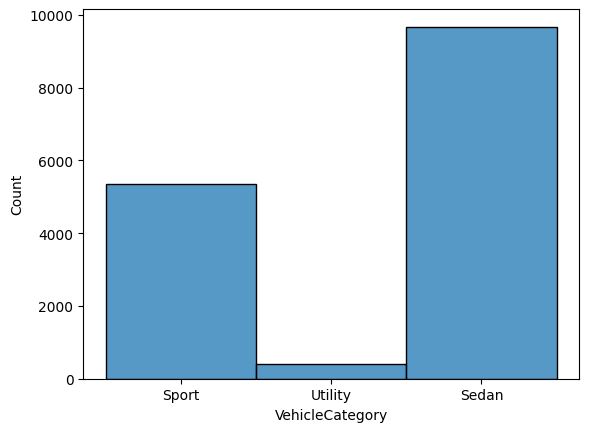

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(car_claims_dataset["VehicleCategory"]) # using this since it is more categorical data and a histogram can be an easy way of showing that

<Axes: xlabel='Make', ylabel='Count'>

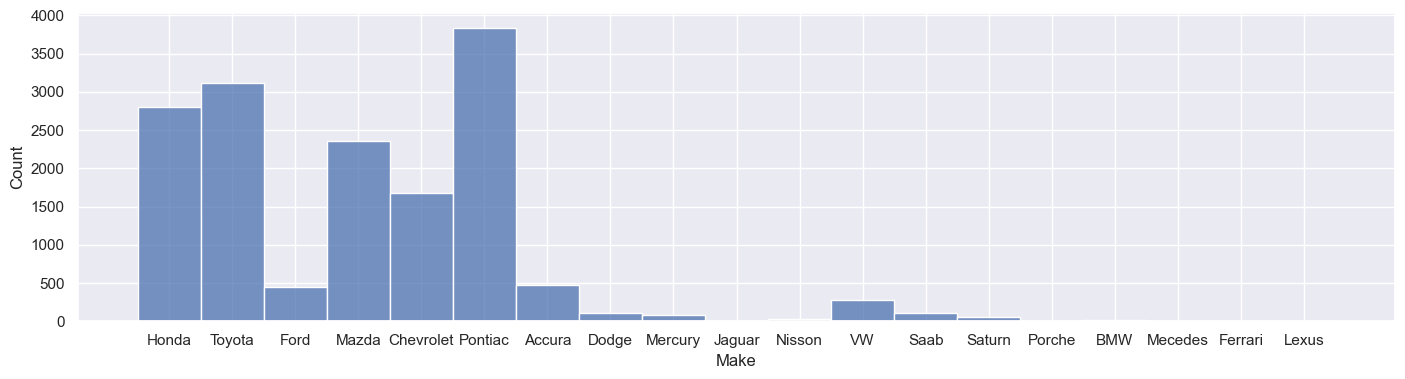

In [27]:
sns.set_theme(rc={'figure.figsize':(17,4)})
sns.histplot(car_claims_dataset["Make"])



This is my sign that this data may be a little dated, pontiac has not made a car in around 15 years so having this many relative to more popular car brands is quite misleading.  In addition having so little Ford vehicles relative to pontiacs as well as competitors in honda and toyota also seems unrepresentitve of the real world.

<Axes: xlabel='AccidentArea', ylabel='Count'>

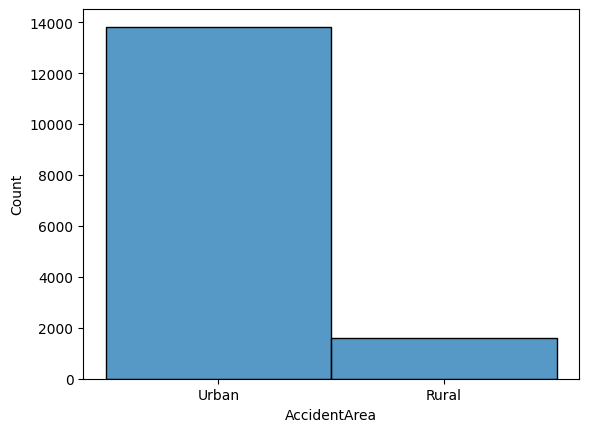

In [26]:
#categorical - this one provides some good insights since it indicates that there are far more claims inside of urban areas in general(if someone lives in an urban area they should probably pay a higher premiuim!)
sns.reset_orig()
sns.histplot(car_claims_dataset["AccidentArea"])

This is very unbalanced, while urban drivers probably do have a higher liklihood of encourntering an accident, I dont think that this is an accurate representation of the real world, where urban drivers are almost 10x as likely as rural drivers to get into an accident.  In addition there is no suburban category, which is where a large proportion of drivers live!

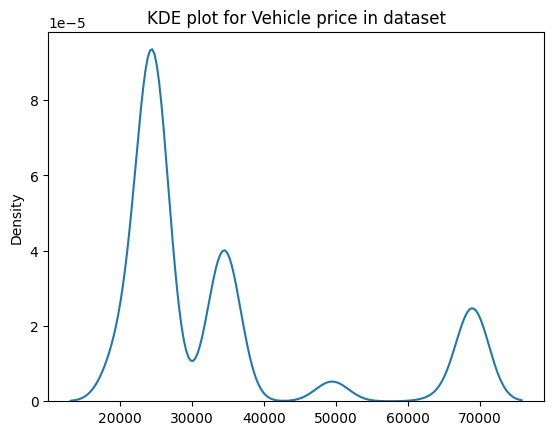

In [39]:
sns.reset_orig()
car_claims_dataset["VehiclePrice"]
#going to have to do some feature engineering here, getting creative and only taking the bottom number in the range, I am taking the mean and splitting on the word 'to'
def get_numberic_only(x):
    if " to " in x:
        y = x.split("to")
        q = y[0]
        z = y[1]
        z_numbers = int("".join(filter(str.isdigit,z)))
        q_numbers = int("".join(filter(str.isdigit,q)))
        return (z_numbers + q_numbers) / 2
    else:
        numbers = filter(str.isdigit,x)
        return int("".join(numbers))
vehicle_price_numberic_only = []

for x in car_claims_dataset["VehiclePrice"]:
    vehicle_price_numberic_only.append(get_numberic_only(x))
sns.kdeplot(vehicle_price_numberic_only)
None
plt.title("KDE plot for Vehicle price in dataset")
None


This is interesting, it looks like it follows a binomial distribution, when considering that there had been feature engineering done and the data does not contain any information regarding car prices above a certain threshold the second spike is density towards 70,000 makes a bit more sense, while this is acceptable I think if the data purely had the real price value for each vehicle it would have more of a tail.

In [42]:
print(f"Mean of the vehicle price {np.mean(vehicle_price_numberic_only)}")

Mean of the vehicle price 33689.429312581065


Text(0.5, 1.0, 'Violin plot for Deductible in dataset')

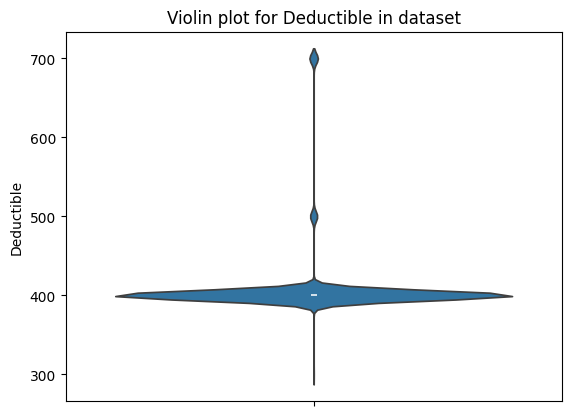

In [40]:
#going to do the same thing as earlier but with deductible, this time make it a violin
sns.reset_orig()
deductible_numberic_only = []
sns.violinplot(car_claims_dataset["Deductible"])
None
plt.title("Violin plot for Deductible in dataset")

  While a large majority are located at 400, this is not as big of a deal, since it is merely the deducitbles from the claims in the dataset, unlike some of the other columns

<Axes: xlabel='Fault', ylabel='Count'>

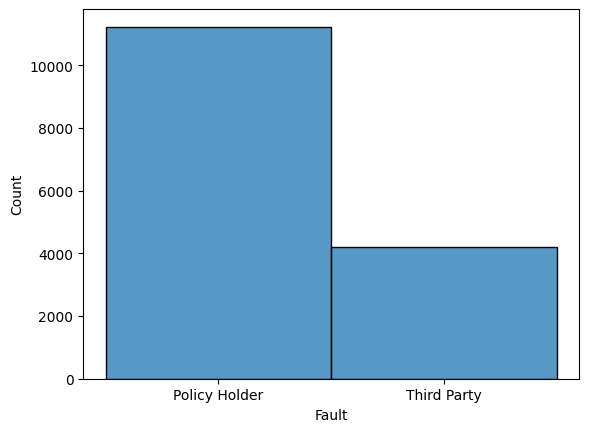

In [52]:
sns.histplot(car_claims_dataset["Fault"])
#most of the accidents in this dataset had been the fault of the policy holder - meaning the dataset might be a bit biased

<Axes: xlabel='Sex', ylabel='Count'>

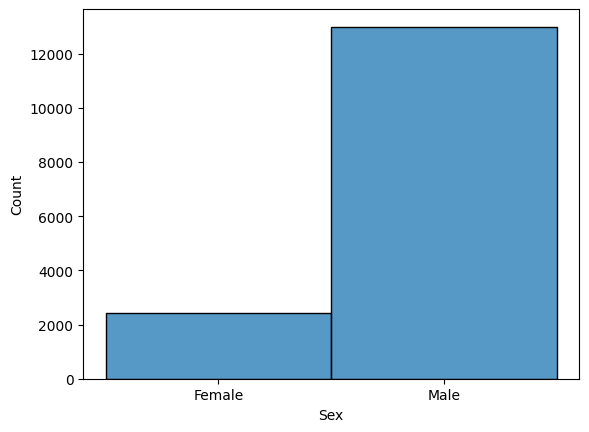

In [ ]:
sns.histplot(car_claims_dataset["Sex"])
#and most of the data for this dataset is from males!  The dataset might lead to a biased model.

<Axes: >

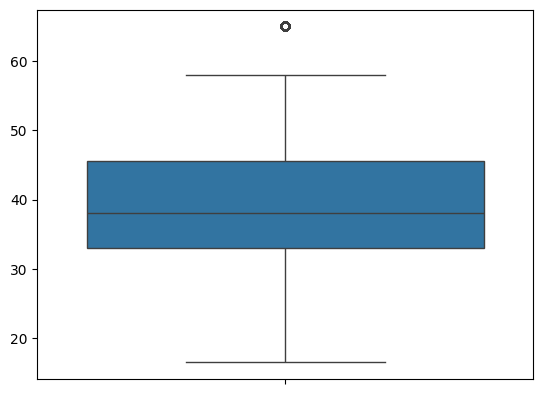

In [59]:
#Lastly we are going to do age
age_numberic_only = [get_numberic_only(x) for x in car_claims_dataset["AgeOfPolicyHolder"]]
sns.boxplot(age_numberic_only)
#interesting, the dataset looks like it has a good range of ages with only one large outliar, but it really does not contain enough data for young drivers

 From this analysis I think that the data is quite unbalanced in a few areas, such as age, sex, as well as the area of the accident, since we are looking for fraud this may not be a bad thing but some of the differences mainly in the sex as well as area of the accident are quite large and seem not representitve of the real world.  Overall, This dataset is useful but a bit unbalanced and maybe should only be used for certain features(ex: training on only male drivers in urban areas) or something similar.


In [66]:
insurance_claims = pd.read_csv("./insurance_claims.csv")
insurance_claims = insurance_claims[insurance_claims['collision_type'] != '?']
insurance_claims = insurance_claims[insurance_claims['property_damage'] != '?']
insurance_claims.drop(columns=["_c39"],inplace=True)
insurance_claims

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,2015-01-30,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,2015-01-05,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,22,21,550127,2007-07-04,IN,250/500,1000,1248.05,0,443550,FEMALE,High School,exec-managerial,movies,husband,37500,-54000,2015-02-15,Multi-vehicle Collision,Rear Collision,Total Loss,Police,SC,Arlington,9682 Cherokee Ridge,3,3,YES,1,2,?,53280,5920,0,47360,Chevrolet,Malibu,2015,N
991,257,44,109392,2006-07-12,OH,100/300,1000,1280.88,0,433981,MALE,MD,other-service,basketball,other-relative,59400,-32200,2015-02-06,Single Vehicle Collision,Rear Collision,Total Loss,Other,WV,Riverwood,5312 Francis Ridge,21,1,NO,0,1,NO,46980,0,5220,41760,Accura,TL,2002,N
992,94,26,215278,2007-10-24,IN,100/300,500,722.66,0,433696,MALE,MD,exec-managerial,camping,husband,50300,0,2015-01-23,Multi-vehicle Collision,Front Collision,Major Damage,Fire,OH,Springfield,1705 Weaver St,6,3,YES,1,2,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N


In [67]:
insurance_claims.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

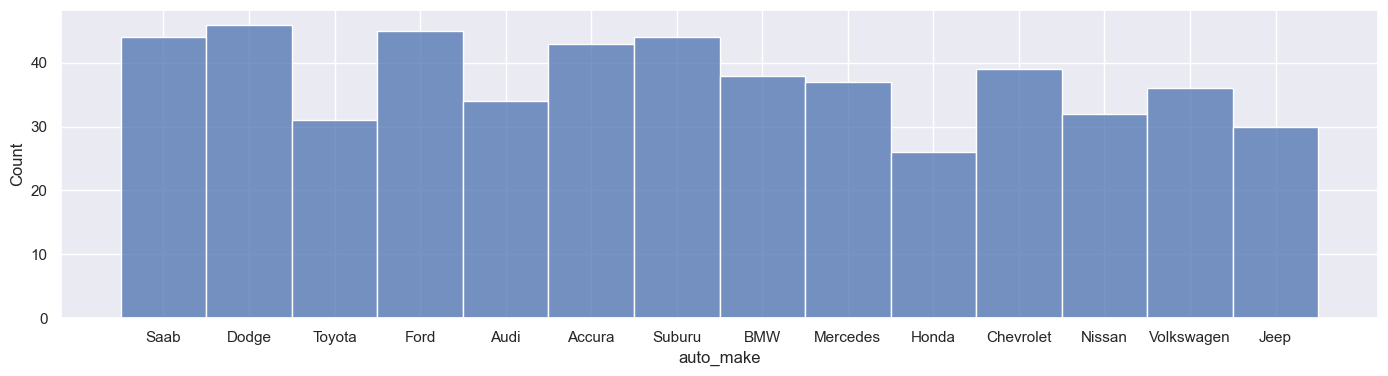

In [69]:
sns.set_theme(rc={'figure.figsize':(17,4)})
sns.histplot(insurance_claims["auto_make"])
None

This is much better than the previous dataset, the makes look to loosly resemble a uniform distribution which is a bit more representitve of the real world, but toyota having lower claims than both audi,bmw, and mercedes is not representitve of the general population, since BMW Mercedes and Audi are more luxury cars.

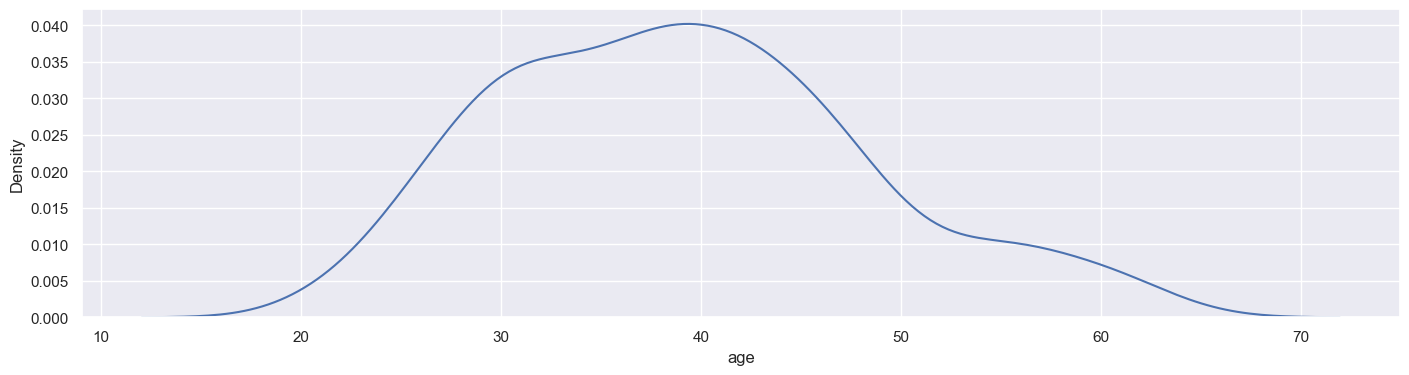

In [71]:
sns.kdeplot(insurance_claims["age"])
None

Again, this is much better than last time, with the age looking a bit more like a normal distribution, I do feel as if young drivers are underrespresented.  In addition there is no feature engineering that must be done on the data, since it does not contain ranges, but rather direct values.

<Axes: xlabel='total_claim_amount', ylabel='Density'>

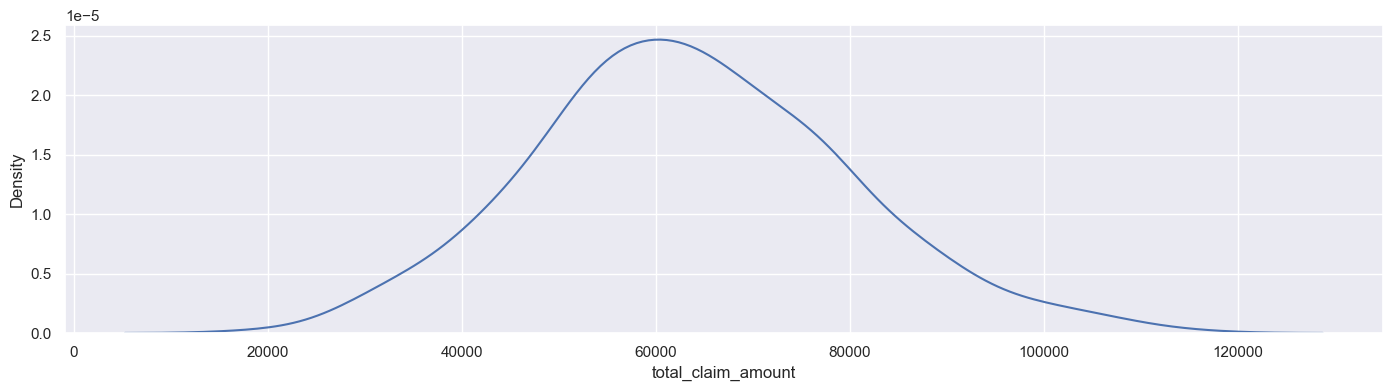

In [73]:
sns.kdeplot(insurance_claims["total_claim_amount"])

Another normal distribution!  This does confirm my earlier statement, this dataset is more representative of higher end more expensive vehicles, since having a claim amount of 60,000 is quite high!

<Axes: xlabel='insured_sex', ylabel='Count'>

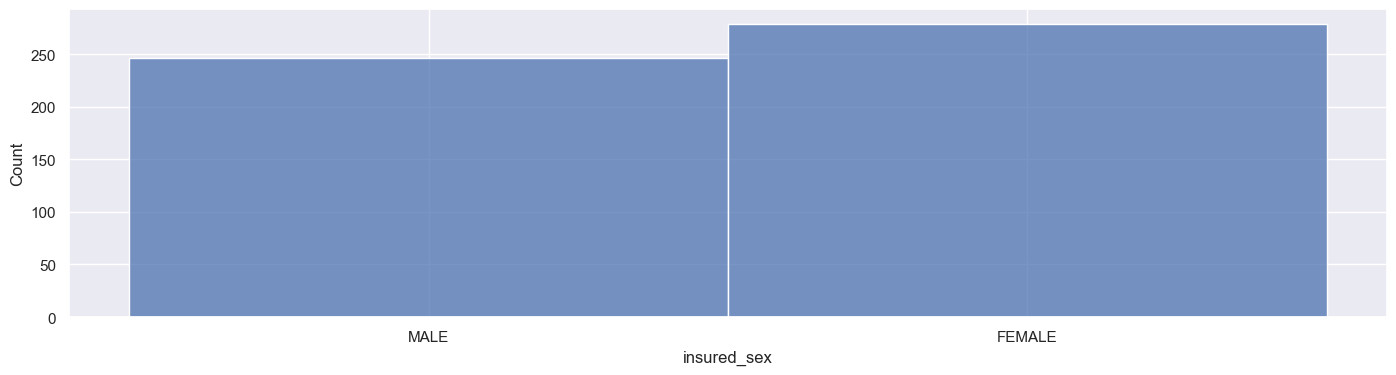

In [75]:
sns.histplot(insurance_claims["insured_sex"])

This looks a bit more skewed female, but not by a lot and is much more accurate than the previous dataset.

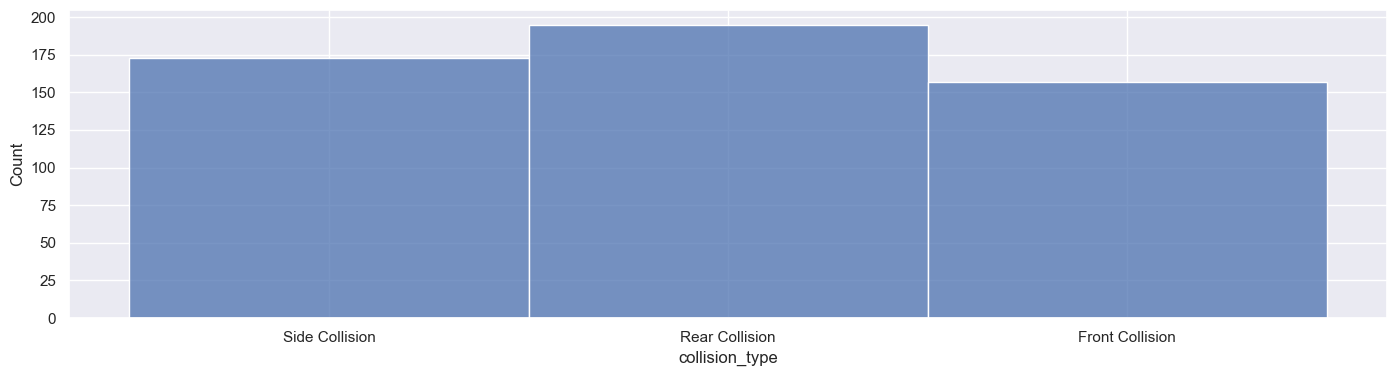

In [77]:
sns.histplot(insurance_claims["collision_type"])
None

This looks like a normal distribution, which is good, looks like rear collision has the most and that makes sense when considering that distracted drivers are more likely to rear end somebody else on the road.

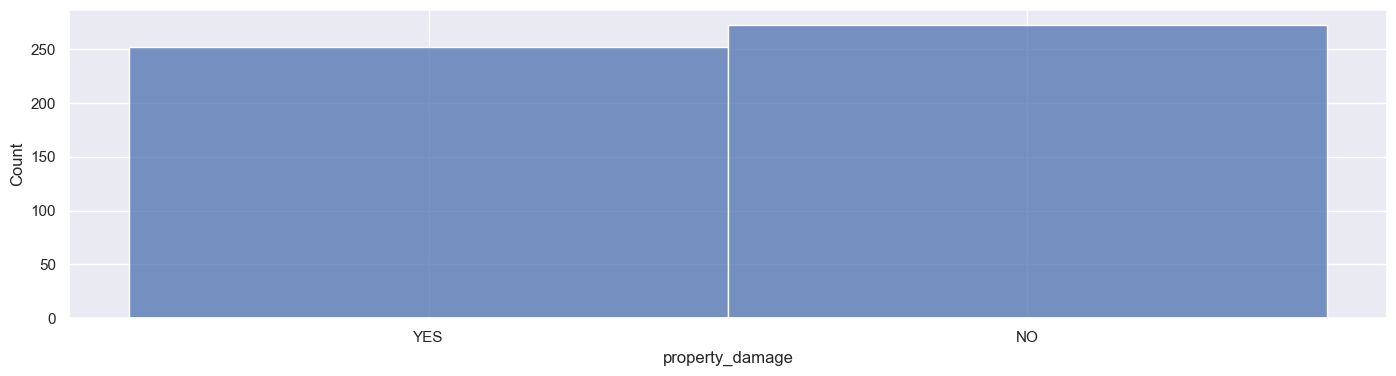

In [81]:
sns.histplot(insurance_claims["property_damage"])
None


This is interesting and I do not think this is useful, I have had to go through the process of submitting property damage and it was not through my auto insurance company but rather my homeowners, I am not sure how they are getting this data or if it is offered within the auto insurance policy but generally I think it should be ignored.

<Axes: xlabel='bodily_injuries', ylabel='Count'>

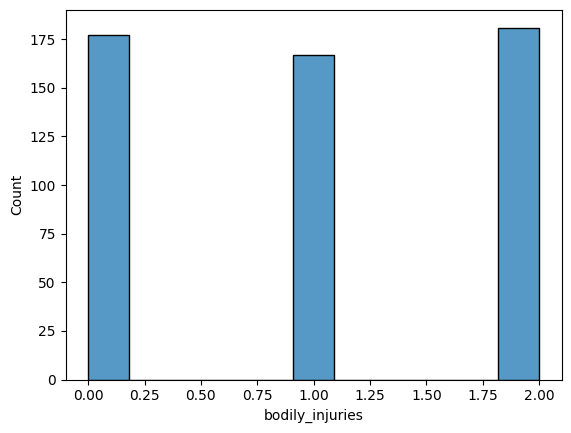

In [84]:
sns.reset_orig()
sns.histplot(insurance_claims["bodily_injuries"])

Another normal distribution - which is to be expected, though I do think 2 as the max in the dataset is a bit low considering if both drivers have a pasenger that is potentially 4, I am not too worried about this in the context of the problem.

<Axes: xlabel='incident_severity', ylabel='Count'>

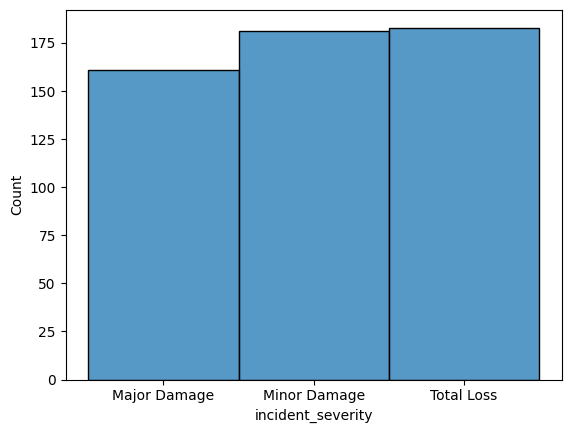

In [85]:
sns.histplot(insurance_claims["incident_severity"])

This dataset seems to be well represented, with normal distributions across most of the columns making the datset fairly balanced.

<Axes: xlabel='injury_claim', ylabel='Density'>

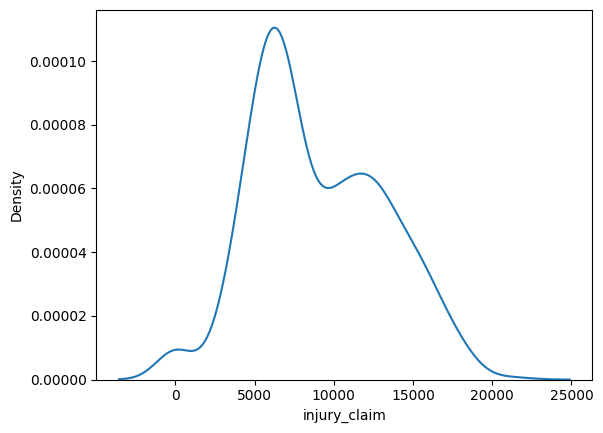

In [91]:
sns.kdeplot(insurance_claims["injury_claim"])

This looks less normal, but there probably is some correlation to the indcident severity, I will plot charts below seperating them to see if there could be a potential correlation.

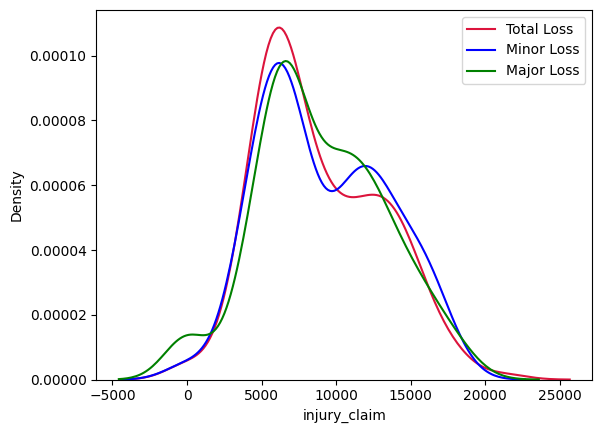

In [98]:
insurance_claims_major = insurance_claims[insurance_claims["incident_severity"] == "Major Damage"]
insurance_claims_minor = insurance_claims[insurance_claims["incident_severity"] == "Minor Damage"]
insurance_claims_total = insurance_claims[insurance_claims["incident_severity"] == "Total Loss"]
sns.kdeplot(insurance_claims_total["injury_claim"],label="Total Loss", color="crimson")
sns.kdeplot(insurance_claims_minor["injury_claim"],label="Minor Loss", color="blue")
sns.kdeplot(insurance_claims_major["injury_claim"],label="Major Loss", color="green")
plt.legend()
None

Interesting, for the most part they all look the same, with total loss looking like it has the lowest density on average for injury claims!

Overall, datset is very strong and balanced, which is good for analysis and modeling on it, and will be much less biased than the previous dataset, though ot having data regarding the type of location such as urban or rural would be nice, this can be done via feature engineering with something such as looking up each zip code and determining the type of region, which would be something I would look to do in the future.

In [99]:
general_fraud_data = pd.read_csv("./insurance_data.csv")
general_fraud_data.describe()

,PREMIUM_AMOUNT,CLAIM_AMOUNT,POSTAL_CODE,AGE,TENURE,NO_OF_FAMILY_MEMBERS,ROUTING_NUMBER,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,88.508595,16563.830000,48288.830500,44.466100,62.949800,4.488400,7.052882e+07,0.699100,0.692800,11.604000
std,48.315874,22037.489735,32467.389801,11.516827,32.890604,1.712588,3.451879e+07,0.458672,0.461356,6.877101
min,6.000000,100.000000,1001.000000,25.000000,6.000000,2.000000,1.000074e+07,0.000000,0.000000,0.000000
25%,62.015000,2000.000000,21061.000000,34.000000,34.000000,3.000000,4.071761e+07,0.000000,0.000000,6.000000
50%,88.835000,7000.000000,37206.000000,45.000000,64.000000,4.000000,7.036614e+07,1.000000,1.000000,12.000000
75%,121.902500,21000.000000,80004.000000,54.000000,92.000000,6.000000,1.000638e+08,1.000000,1.000000,18.000000
max,200.000000,100000.000000,99669.000000,64.000000,119.000000,7.000000,1.299981e+08,1.000000,1.000000,23.000000


In [100]:
general_fraud_data

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,SSN,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,ROUTING_NUMBER,ACCT_NUMBER,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,Christopher Demarest,7701 West Saint John Road,#2010,Glendale,AZ,85308,087-11-1946,Y,54,89,Y,3,L,Own,LI,109134974,HXJP58258181908465,Bachelor,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,Ricardo Gatlin,8595 West 81st Drive,NaN,Arvada,CO,80005,685-33-3536,N,61,80,Y,4,L,Rent,MI,40125819,JUND46859540983731,Bachelor,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,Lashawn Engles,637 Britannia Drive,NaN,Vallejo,CA,94591,378-36-0672,N,47,68,Y,6,L,Rent,MI,99513168,WGZZ90128415227650,PhD,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,Steven Bassett,2803 River Drive,NaN,Thunderbolt,GA,31404,669-92-1861,Y,36,16,Y,7,L,Mortgage,MI,18429110,WIKE91555436351397,Masters,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,Jason Rodriguez,7573 National Drive,NaN,Livermore,CA,94550,703-40-1033,Y,51,16,Y,2,M,Rent,HI,70752391,VYJW71311537294027,Masters,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2021-06-30 00:00:00,TXN00009996,A00006029,PLC00007245,2014-04-11,2021-06-25,2021-06-26,Motor,105.75,1000,Patrick Hauman,126 Marjorie Lane,C,Manchester,CT,6042,711-20-5046,N,45,98,Y,3,M,Own,MI,89109346,FIDL48830187432471,PhD,A,Minor Loss,Ambulance,1,1,CT,Manchester,0,AGENT00779,NaN
9996,2021-06-30 00:00:00,TXN00009997,A00003555,PLC00002590,2015-08-25,2021-06-12,2021-06-17,Life,64.59,67000,Paula Noel,501 West Maple Street,#203,Fayetteville,AR,72701,069-65-6089,Y,52,92,Y,3,L,Mortgage,LI,89666038,ZWBN24881448170175,Masters,A,Total Loss,Police,1,0,MA,Worcester,6,AGENT00254,VNDR00598
9997,2021-06-30 00:00:00,TXN00009998,A00004230,PLC00006613,2018-10-11,2021-06-18,2021-06-23,Health,183.50,8000,Luis Clark,10980 Splendor Loop,NaN,Anchorage,AK,99577,743-01-9480,Y,53,32,Y,2,M,Mortgage,LI,34475591,ACXF69390753250566,Bachelor,A,Major Loss,NaN,1,1,OK,Oklahoma City,12,AGENT00786,VNDR00104
9998,2021-06-30 00:00:00,TXN00009999,A00006694,PLC00001781,2016-01-29,2021-06-16,2021-06-21,Motor,113.46,2000,Ryan Gordon,19 Heritage,NaN,Oakland,CA,94605,574-84-6660,Y,61,44,Y,7,M,Rent,MI,59003728,QNEI58902443815498,Bachelor,A,Total Loss,Ambulance,0,1,AR,Fayetteville,6,AGENT00927,VNDR00185


In [102]:
general_fraud_data_auto = general_fraud_data[general_fraud_data["INSURANCE_TYPE"] == "Motor"]
general_fraud_data_auto.describe()

,PREMIUM_AMOUNT,CLAIM_AMOUNT,POSTAL_CODE,AGE,TENURE,NO_OF_FAMILY_MEMBERS,ROUTING_NUMBER,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY
count,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1.574000e+03,1574.000000,1574.000000,1574.000000
mean,105.077497,5503.811944,48068.777001,44.636595,62.263659,4.496823,7.060369e+07,0.681067,0.707116,11.481576
std,20.260629,2889.518636,32801.716224,11.562433,32.540196,1.714061,3.414089e+07,0.466211,0.455230,6.947856
min,70.050000,1000.000000,1007.000000,25.000000,6.000000,2.000000,1.000074e+07,0.000000,0.000000,0.000000
25%,87.650000,3000.000000,21037.000000,35.000000,33.000000,3.000000,4.182330e+07,0.000000,0.000000,5.000000
50%,104.940000,6000.000000,37206.000000,45.000000,64.000000,4.000000,6.982213e+07,1.000000,1.000000,11.000000
75%,122.782500,8000.000000,80004.000000,55.000000,90.000000,6.000000,9.927678e+07,1.000000,1.000000,18.000000
max,139.930000,10000.000000,99669.000000,64.000000,119.000000,7.000000,1.298949e+08,1.000000,1.000000,23.000000


In [103]:
general_fraud_data_auto.columns

Index(['TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER',
       'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT', 'INSURANCE_TYPE',
       'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1',
       'ADDRESS_LINE2', 'CITY', 'STATE', 'POSTAL_CODE', 'SSN',
       'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS',
       'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE',
       'SOCIAL_CLASS', 'ROUTING_NUMBER', 'ACCT_NUMBER',
       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE',
       'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY',
       'AGENT_ID', 'VENDOR_ID'],
      dtype='object')

In [117]:
general_fraud_data_auto.iloc[0:5]

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,SSN,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,ROUTING_NUMBER,ACCT_NUMBER,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
7,2020-06-01 00:00:00,TXN00000008,A00004301,PLC00002925,2018-12-30,2020-05-14,2020-05-19,Motor,83.77,8000,Maryalice Martinez,6 Little Country Place,NaN,Savannah,GA,31406,791-66-5539,Y,35,97,Y,3,L,Rent,MI,89467431,ZLMN59372702463649,High School,A,Total Loss,Police,0,1,FL,Panama City Beach,10,AGENT00152,VNDR00326
8,2020-06-01 00:00:00,TXN00000009,A00004671,PLC00006886,2019-06-27,2020-05-21,2020-05-26,Motor,82.14,5000,Nicholas Hamilton,642 South 2nd Street,#608,Louisville,KY,40202,427-41-7221,N,27,118,Y,4,H,Mortgage,MI,107890252,EVZR61264221554624,Bachelor,A,Major Loss,Police,0,1,AZ,Glendale,22,AGENT00450,VNDR00437
11,2020-06-01 00:00:00,TXN00000012,A00006313,PLC00002139,2016-07-22,2020-05-21,2020-05-26,Motor,101.15,8000,Patricia Garrett,6721 Boundary Run,NaN,Nashville,TN,37221,224-80-1633,Y,42,39,Y,2,H,Own,HI,11697253,YGZM08271540598654,High School,D,Major Loss,Ambulance,1,1,CT,Manchester,3,AGENT00288,NaN
15,2020-06-01 00:00:00,TXN00000016,A00008033,PLC00008152,2011-01-25,2020-05-12,2020-05-17,Motor,128.73,9000,William Halcomb,5124 E Street Southeast,NaN,Washington,DC,20019,142-09-4530,Y,57,48,Y,2,L,Rent,LI,115671968,KNLE94705483907630,NaN,A,Minor Loss,Police,0,1,AR,Fayetteville,22,AGENT00608,VNDR00051
18,2020-06-01 00:00:00,TXN00000019,A00009265,PLC00000619,2017-11-03,2020-05-27,2020-05-28,Motor,116.55,8000,Marshall Worm,119 Oakland Street,NaN,Manchester,CT,6042,848-09-7847,N,45,69,Y,4,H,Mortgage,MI,117427424,WGFI36482098909043,High School,A,Total Loss,Ambulance,0,1,MA,Fitchburg,20,AGENT00994,VNDR00107


<Axes: xlabel='PREMIUM_AMOUNT', ylabel='Density'>

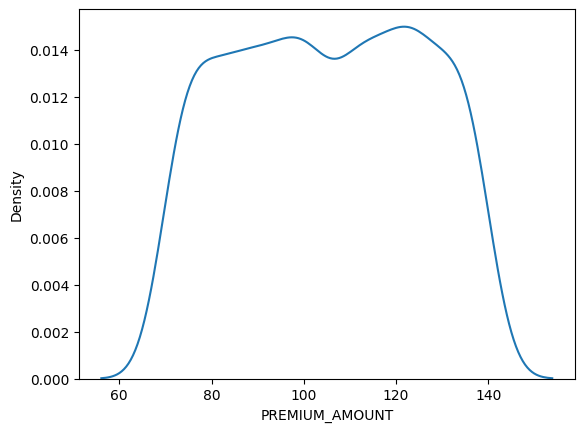

In [118]:
sns.kdeplot(general_fraud_data_auto["PREMIUM_AMOUNT"])

This distribution looks normal, but the premium amounts look a bit low, I will group by the social class and see that happens to them to see if they have any correlation.

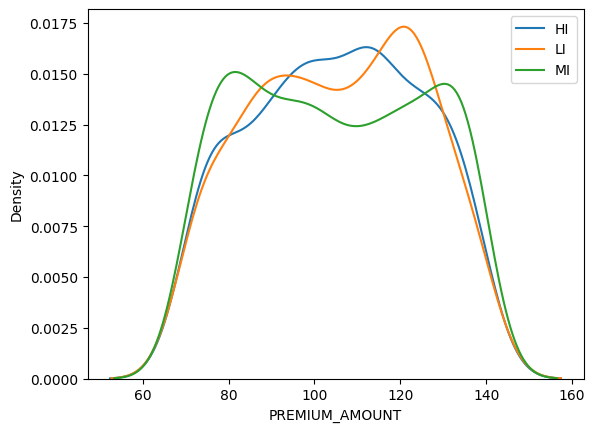

In [125]:
df_7 = general_fraud_data_auto.groupby("SOCIAL_CLASS")["PREMIUM_AMOUNT"]
for name,group in df_7:
    sns.kdeplot(data=group,label=name)

plt.legend()
None


They all look a bit similar, but it is interesint how the lower income group seems to have a higher density towards the higher premium amount, this is worth noting.

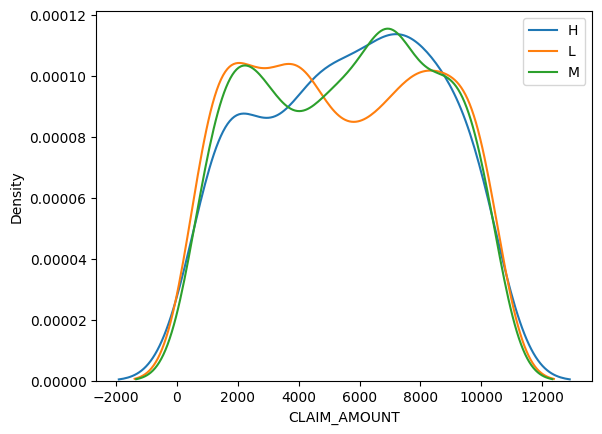

In [126]:
df_8 = general_fraud_data_auto.groupby("RISK_SEGMENTATION")["CLAIM_AMOUNT"]
for name,group in df_8:
    sns.kdeplot(data=group,label=name)

plt.legend()
None

This chart shows the desnity of the claim amount when looking at risk segmentation, it is interesting how the lower risk individuals have lower claim amounts while the medium seem to have the highest density peak relative to the claim amount.

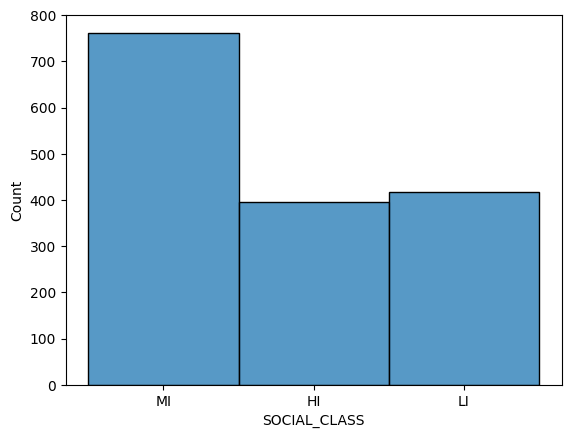

In [132]:
sns.histplot(general_fraud_data_auto["SOCIAL_CLASS"])
None

While this is not a uniform and perfectly balanced distribution, I believe that this is for the best, majority of pepople are middle class and this chart and data represents that.

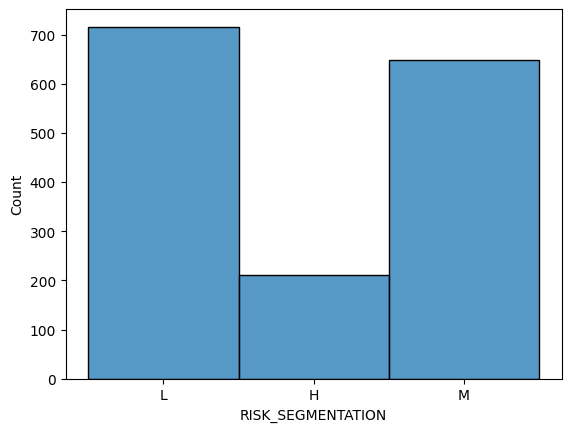

In [133]:
sns.histplot(general_fraud_data_auto["RISK_SEGMENTATION"])
None

Like the earlier graph, this is representative of the general population again, most people are not high risk drivers, and the majority are deemed low risk, the criteria for determining the risk is not public for this dataset, which would be useful in coming to some conclusions about what this represents.

<Axes: xlabel='EMPLOYMENT_STATUS', ylabel='Count'>

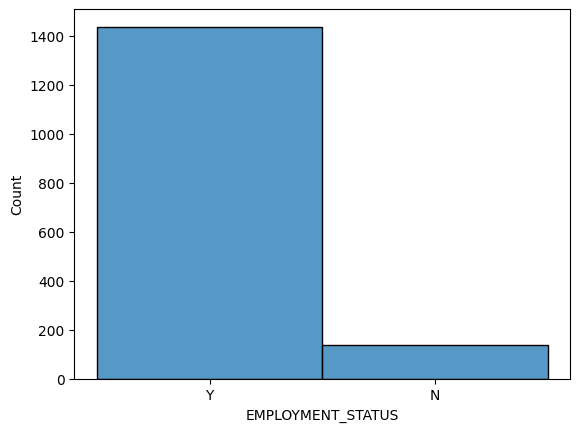

In [134]:
sns.histplot(general_fraud_data_auto["EMPLOYMENT_STATUS"])

This one gives a new insight into the data, if we assume the data is representative of the population, and we know all of the entries in this data set had been found to commit insurance fraud, it shows that a previous assumption may be wrong regarding insurance fraud and employment status, majority of the entries in this dataset are from people who are employed.

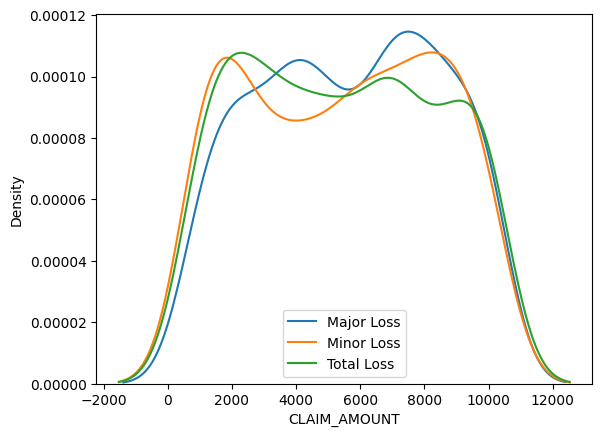

In [135]:
df_8 = general_fraud_data_auto.groupby("INCIDENT_SEVERITY")["CLAIM_AMOUNT"]
for name,group in df_8:
    sns.kdeplot(data=group,label=name)

plt.legend()

This graph shows a logical connection between the loss as well as the claim amount in fradulent claims, claims deemed as a minor loss can have very high claim amounts, which is indicitive of fraud. 

Overall I think the uniqe thing about this dataset is that we know every entry in it had comitted fruad, so it could be of good use for unsupervided learning.  In addition a lot of the features look to share some correlation with the risk level as well as the social class(which is a great feature as well as unique).  I think out of the three this dataset is the second most useful and offers some great initial insights into the data.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

C:\Users\Joe\AppData\Local\Temp\ipykernel_9012\3923271710.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Jan", "Feb", "March", "April", "May", "June"])


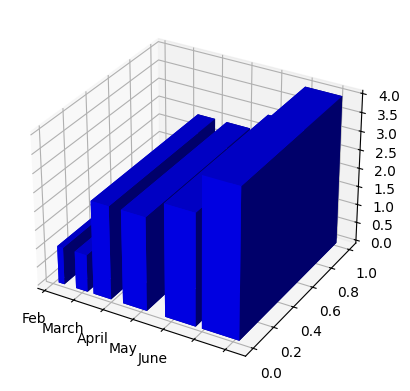

In [16]:

#making the 3d bar chart
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6]
y = [1,1,1,1,1,1]
z = [1,1,2.5,2.5,3,4]
x_pos = [1,4,7,12,19,25]
y_pos = [0,0,0,0,0,0]
z_pos = [0,0,0,0,0,0]


fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.bar3d(x_pos,y_pos,z_pos,x,y,z,color="blue")
ax.set_xticklabels(["Jan", "Feb", "March", "April", "May", "June"])
None
